In [1]:
#initialization
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.circuit.library import C3XGate
# import basic plot tools
from qiskit.visualization import plot_histogram

import mplhep
plt.style.use(mplhep.style.LHCb2)  # CMS or ATLAS/LHCb

In [2]:
def initialize_s(qc, n_qubit, num_matching):
    """Apply a H-gate to 'qubits' in qc"""
    qc.x(n_qubit - 1)
    qc.h(n_qubit - 1)
    for q in range(num_matching):
        qc.h(q)
    #qc.reset(num_qubit)
    #qc.h(num_qubit)
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [3]:
def diffuser(qc, nqubits, n_qubit):
    qc.barrier(list(range(n_qubit-1)))
    #qc = QuantumCircuit(nqubits)
    # Apply transformation |s> -> |00..0> (H-gates)
    for qubit in range(nqubits):
        qc.h(qubit)
    # Apply transformation |00..0> -> |11..1> (X-gates)
    for qubit in range(nqubits):
        qc.x(qubit)
    # Do multi-controlled-Z gate
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)  # multi-controlled-toffoli
    qc.h(nqubits-1)
    qc.barrier(list(range(nqubits-1)))
    # Apply transformation |11..1> -> |00..0>
    for qubit in range(nqubits):
        qc.x(qubit)
    # Apply transformation |00..0> -> |s>
    for qubit in range(nqubits):
        qc.h(qubit)
    # We will return the diffuser as a gate
    #U_s = qc.to_gate()
    #U_s.name = "diffuser"
    return qc

In [4]:
def case_AABB(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([0, 1])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([0, 1])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [5]:
def case_ABAB(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([0, 2])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([0, 2])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [6]:
def case_ABBA(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([0, 3])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([0, 3])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [7]:
def case_BAAB(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([1, 2])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([1, 2])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [9]:
def case_BABA(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([1, 3])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([1, 3])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [10]:
def case_BBAA(qc, n_qubit):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))
    qc.x([2, 3])
    qc.mct([0, 1, 2, 3], 4)  # multi-controlled-toffoli
    qc.x([2, 3])
    qc.barrier(list(range(n_qubit-1)))
    return qc

In [11]:
def rotate_A1(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    qc.x([0])
    qc.cry(angle, 0, 5)
    qc.x([0])
    
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [12]:
def rotate_B1(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    #qc.x([0])
    qc.cry(angle, 0, 5)
    #qc.x([0])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [13]:
def rotate_A2(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    qc.x([1])
    qc.cry(angle, 1, 6)
    qc.x([1])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [14]:
def rotate_B2(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    #qc.x([1])
    qc.cry(angle, 1, 6)
    #qc.x([1])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [15]:
def rotate_A3(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    qc.x([2])
    qc.cry(angle, 2, 7)
    qc.x([2])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [16]:
def rotate_B3(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    #qc.x([2])
    qc.cry(angle, 2, 7)
    #qc.x([2])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [17]:
def rotate_A4(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    qc.x([3])
    qc.cry(angle, 3, 8)
    qc.x([3])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

In [18]:
def rotate_B4(qc, n_qubit, angle):
    #qc = QuantumCircuit(12)
    qc.barrier(list(range(n_qubit-1)))

    #qc.x([3])
    qc.cry(angle, 3, 8)
    #qc.x([3])
    qc.barrier(list(range(n_qubit-1)))
    #oracle_edge13 = qc.to_gate()
    #oracle_edge13.name = "edge13"
    #qc.draw()
    return qc

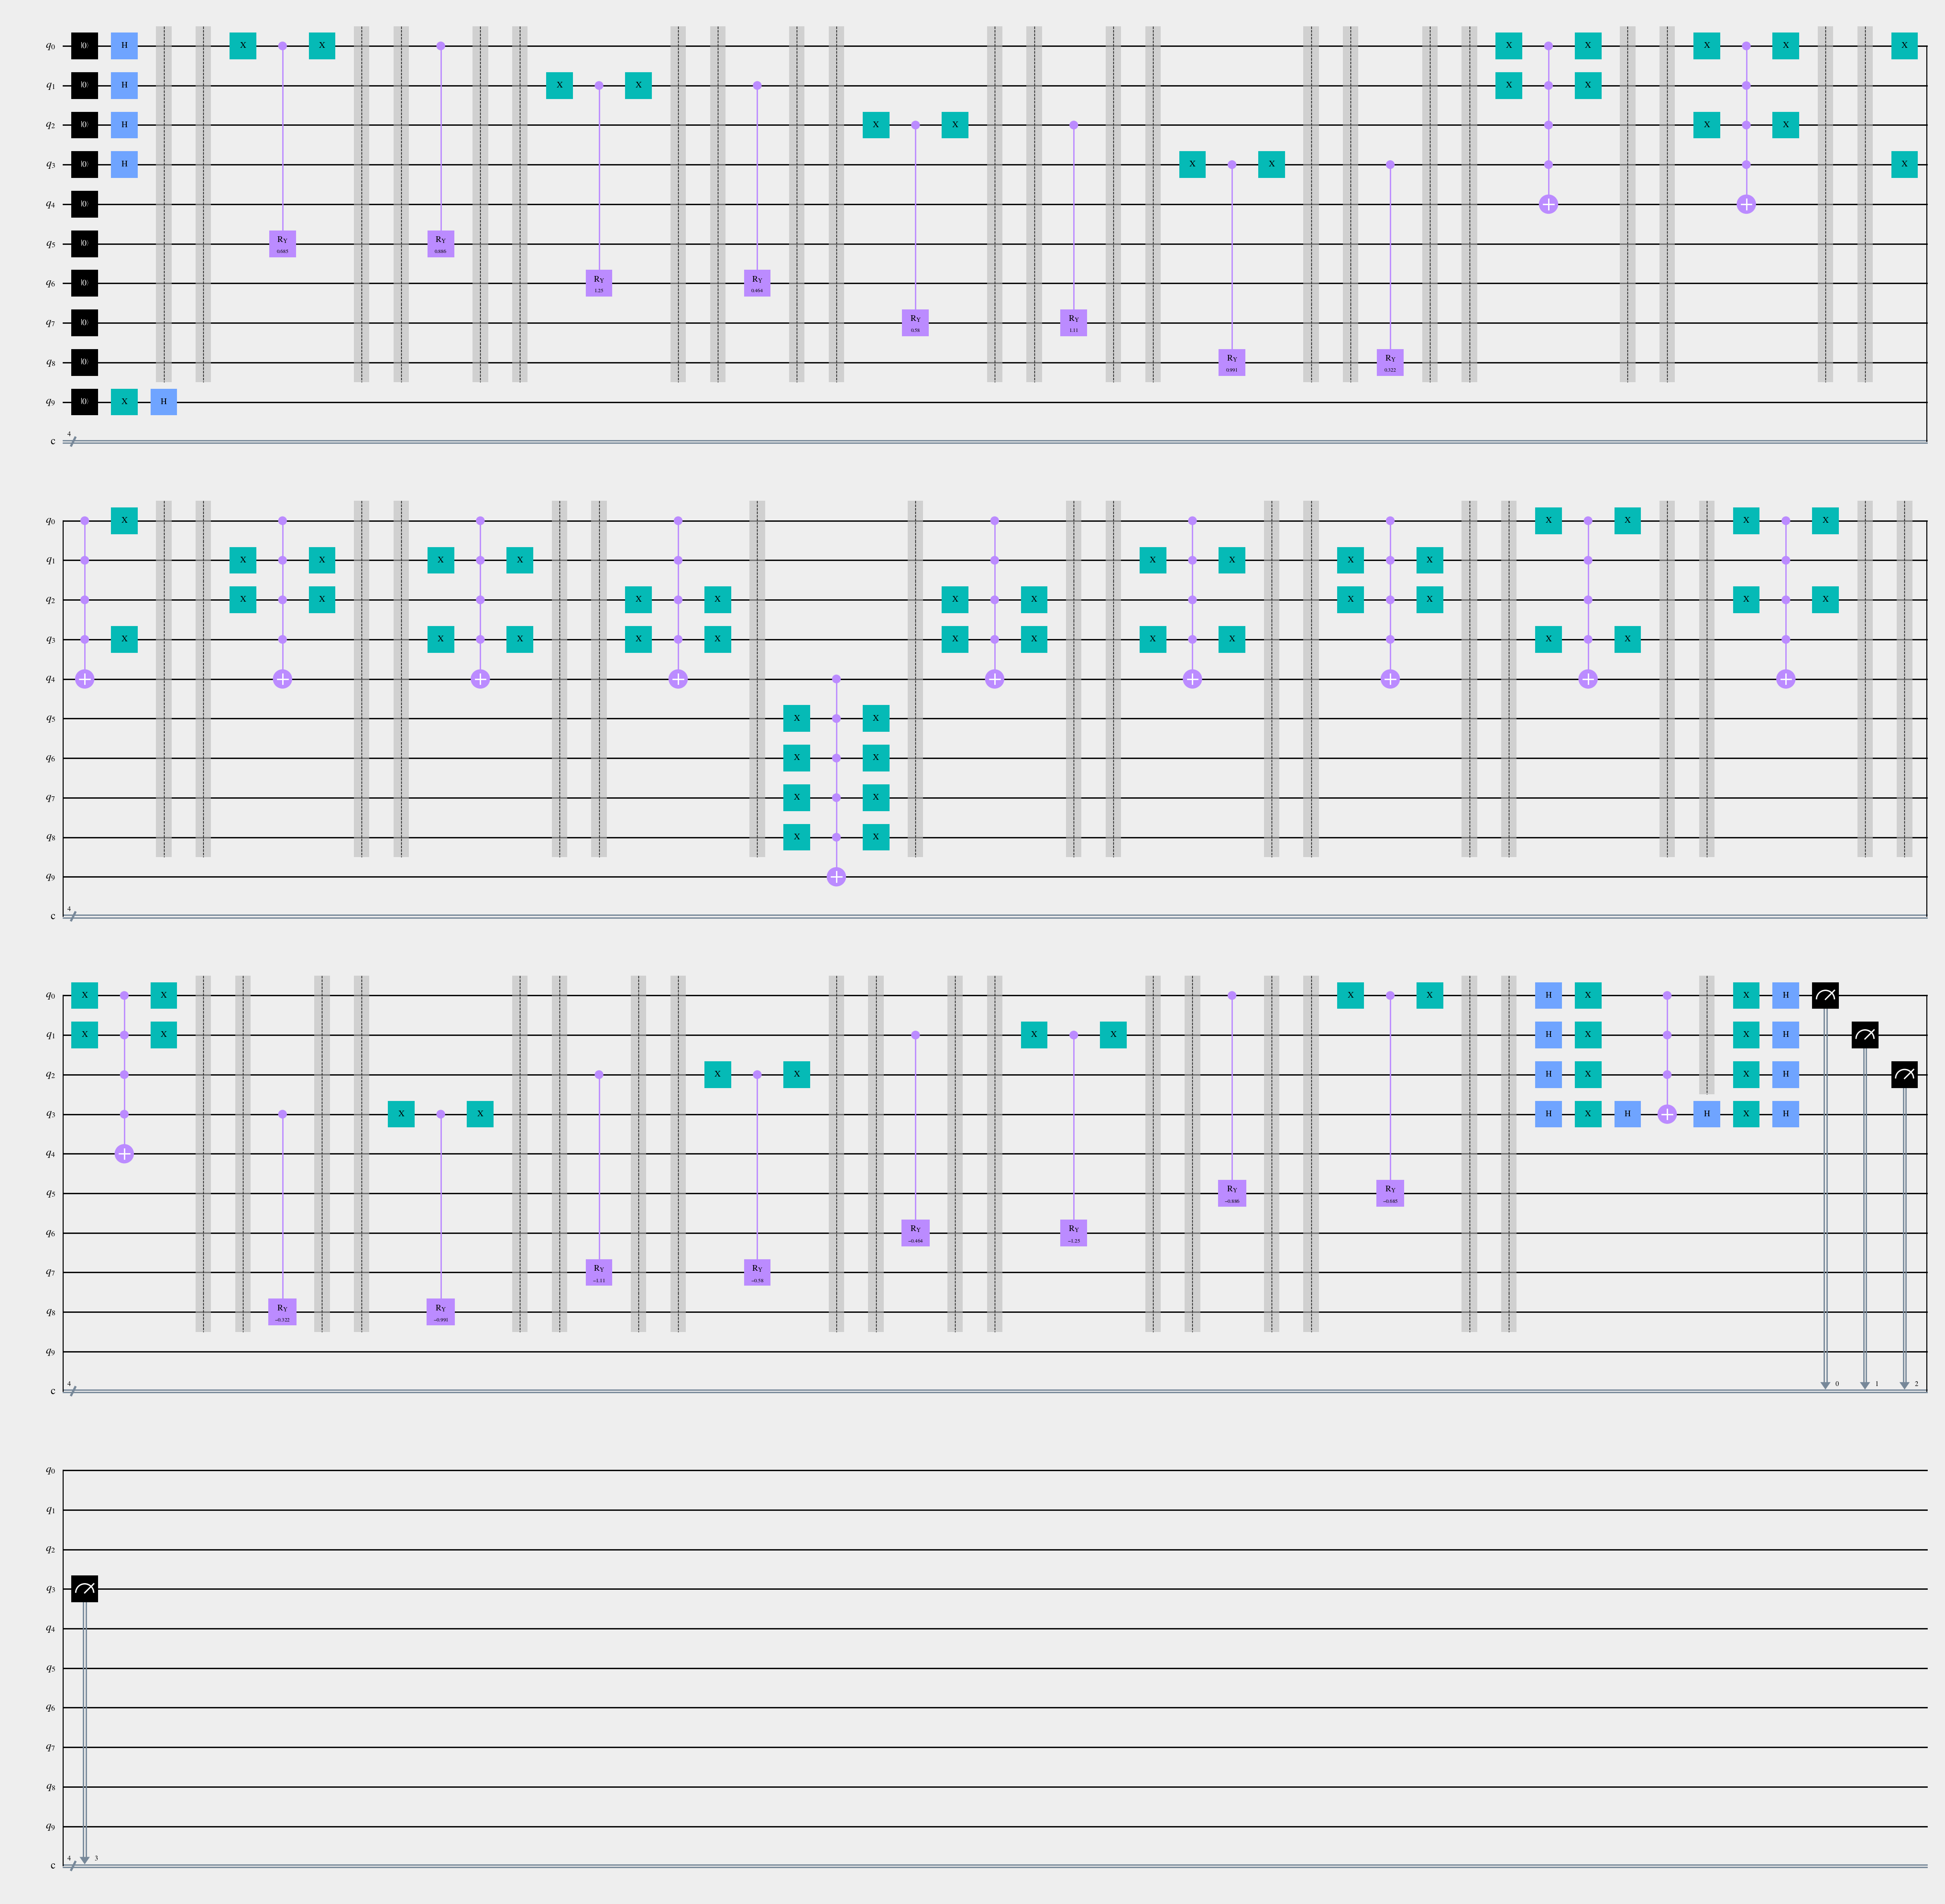

In [19]:
n_qubit = 10
n_matching = 4
grover_circuit = QuantumCircuit(n_qubit, n_matching)
grover_circuit.reset(range(0, n_qubit))
grover_circuit = initialize_s(grover_circuit, n_qubit, n_matching)
for i in range(1):
    grover_circuit = rotate_A1(grover_circuit, n_qubit, 0.68472)
    grover_circuit = rotate_B1(grover_circuit, n_qubit, 0.88608)
    grover_circuit = rotate_A2(grover_circuit, n_qubit, 1.249)
    grover_circuit = rotate_B2(grover_circuit, n_qubit, 0.46365)
    grover_circuit = rotate_A3(grover_circuit, n_qubit, 0.57964)
    grover_circuit = rotate_B3(grover_circuit, n_qubit, 1.1071)
    grover_circuit = rotate_A4(grover_circuit, n_qubit, 0.99116)
    grover_circuit = rotate_B4(grover_circuit, n_qubit, 0.32175)
    grover_circuit = case_AABB(grover_circuit, n_qubit)
    grover_circuit = case_ABAB(grover_circuit, n_qubit)
    grover_circuit = case_ABBA(grover_circuit, n_qubit)
    grover_circuit = case_BAAB(grover_circuit, n_qubit)
    grover_circuit = case_BABA(grover_circuit, n_qubit)
    grover_circuit = case_BBAA(grover_circuit, n_qubit)
    grover_circuit.x([5, 6, 7, 8])
    grover_circuit.mcx([4, 5, 6, 7, 8], n_qubit-1)
    grover_circuit.x([5, 6, 7, 8])
    grover_circuit = case_BBAA(grover_circuit, n_qubit)
    grover_circuit = case_BABA(grover_circuit, n_qubit)
    grover_circuit = case_BAAB(grover_circuit, n_qubit)
    grover_circuit = case_ABBA(grover_circuit, n_qubit)
    grover_circuit = case_ABAB(grover_circuit, n_qubit)
    grover_circuit = case_AABB(grover_circuit, n_qubit)
    grover_circuit = rotate_B4(grover_circuit, n_qubit, -0.32175)
    grover_circuit = rotate_A4(grover_circuit, n_qubit, -0.99116)
    grover_circuit = rotate_B3(grover_circuit, n_qubit, -1.1071)
    grover_circuit = rotate_A3(grover_circuit, n_qubit, -0.57964)
    grover_circuit = rotate_B2(grover_circuit, n_qubit, -0.46365)
    grover_circuit = rotate_A2(grover_circuit, n_qubit, -1.249)
    grover_circuit = rotate_B1(grover_circuit, n_qubit, -0.88608)
    grover_circuit = rotate_A1(grover_circuit, n_qubit, -0.68472)
    grover_circuit = diffuser(grover_circuit, 4, n_qubit)
grover_circuit.measure([0, 1, 2, 3], [0, 1, 2, 3])
grover_circuit.draw(output='mpl', scale = 1.0, fold = 47, style={'backgroundcolor': '#EEEEEE'}, filename = "weighted2x4circuit.jpeg", plot_barriers = True)

In [24]:
from qiskit import BasicAer, Aer,execute
sim = Aer.get_backend('aer_simulator_statevector')
sim.set_options(device='CPU')
#sim = Aer.get_backend('aer_simulator')

In [25]:
job = execute(grover_circuit, backend = sim, shots = 100000)

In [26]:
counts = job.result().get_counts()

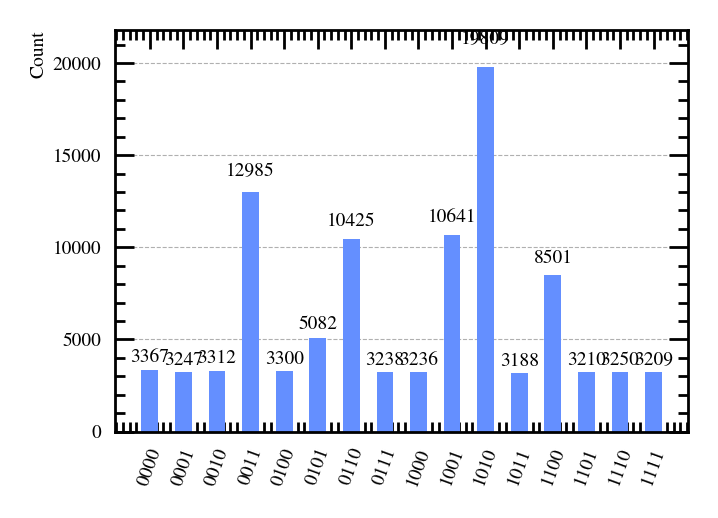

In [27]:
plot_histogram(counts)

In [32]:
type(counts)

qiskit.result.counts.Counts

In [33]:
max(counts, key=counts.get)

'1010'

In [34]:
sorted(counts, key=counts.get, reverse= True)

['1010',
 '0011',
 '1001',
 '0110',
 '1100',
 '0101',
 '0010',
 '1101',
 '1110',
 '1000',
 '0111',
 '0000',
 '0100',
 '0001',
 '1111',
 '1011']